In [1]:
!pip install ultralytics

In [2]:
!pip install openvino

In [3]:
!pip install pyyaml

In [4]:
from ultralytics import YOLO
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import os
import yaml
import openvino as ov

In [5]:
yaml_file_path = 'models/best_openvino_model/metadata.yaml'

with open(yaml_file_path, 'r') as yaml_file:
    data = yaml.safe_load(yaml_file)

model_imgsz = data['imgsz'][0]
model_imgsz

640

In [6]:
models_dir = Path('./models')
DET_MODEL_NAME = "best"
det_model_path = models_dir / f"{DET_MODEL_NAME}_openvino_model/{DET_MODEL_NAME}.xml"
if not det_model_path.exists():
    det_model.export(format="openvino", dynamic=True, half=False)

In [7]:
conf=0.7
iou_conf=0.5

In [8]:
from set_vino.load_vino_port import LoadVino
det_model_path="models/best_openvino_model/best.xml"
label_map = {
    0: 'address',
    1: 'company',
    2: 'email',
    3: 'name',
    4: 'position',
    5: 'tel'
}  
selected_device = "CPU"
core = ov.Core()

det_ov_model = core.read_model(det_model_path)
det_ov_model.reshape({0: [1, 3, model_imgsz, model_imgsz]})
det_compiled_model = core.compile_model(det_ov_model, selected_device)

loader = LoadVino(det_model_path, selected_device, label_map, model_imgsz)
# Define a function to perform detection

IMAGE_PATH = Path('predict-img/business-card-predict-2.jpg')
input_image = np.array(Image.open(IMAGE_PATH))

In [9]:
result = loader.process_output(input_image, input_image.shape[1], input_image.shape[0],conf, iou_conf)

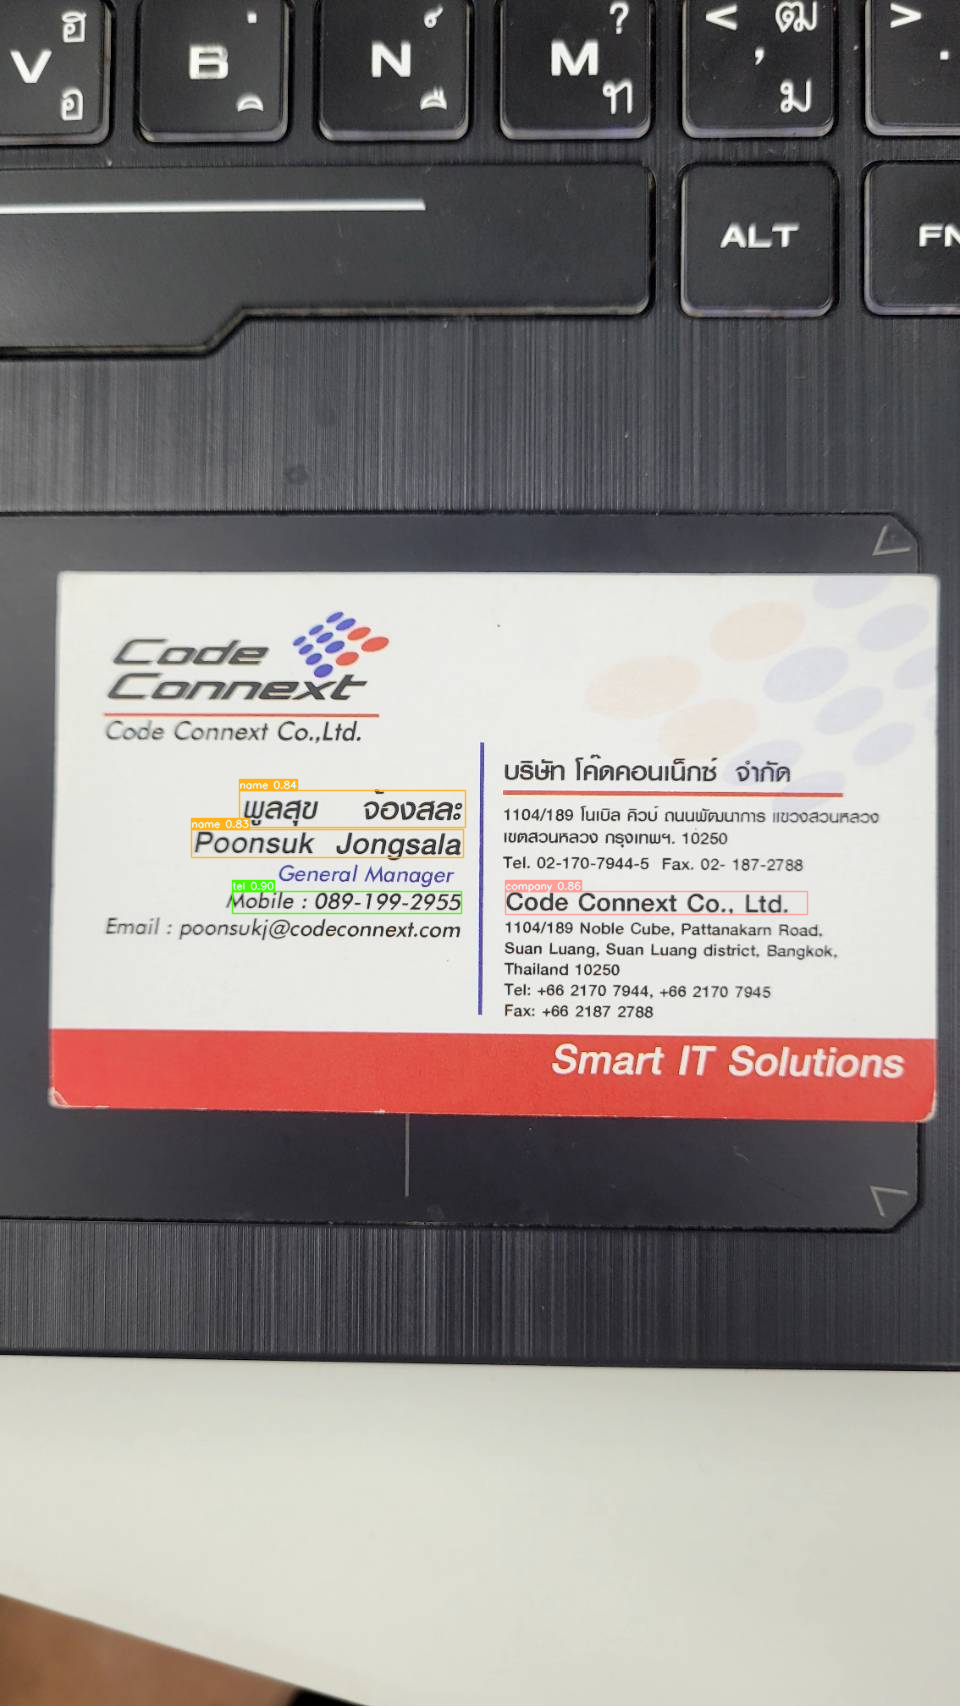

In [10]:
image_with_boxes = loader.draw_results(result, input_image, label_map)
Image.fromarray(image_with_boxes)

In [11]:
loader.format_detection(result, label_map)
# loader.to_json()
# print(loader.to_json())

[{'confident': 0.900967001914978,
  'label': 'tel',
  'description': 'Object-Detection',
  'xmin': 232,
  'ymin': 891,
  'xmax': 461,
  'ymax': 913},
 {'confident': 0.8618897199630737,
  'label': 'company',
  'description': 'Object-Detection',
  'xmin': 505,
  'ymin': 891,
  'xmax': 807,
  'ymax': 914},
 {'confident': 0.8369322419166565,
  'label': 'name',
  'description': 'Object-Detection',
  'xmin': 239,
  'ymin': 790,
  'xmax': 465,
  'ymax': 827},
 {'confident': 0.8342084884643555,
  'label': 'name',
  'description': 'Object-Detection',
  'xmin': 191,
  'ymin': 829,
  'xmax': 463,
  'ymax': 857}]